In [3]:
import pandas as pd
import re
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [1]:
input_file = "wan.txt"
output_dir = "runs_csv"

os.makedirs(output_dir, exist_ok=True)

with open(input_file, "r") as f:
    lines = f.readlines()

runs = {}
current_run = None
header = None
data_rows = []

for line in lines:
    line = line.strip()
    
    run_match = re.match(r"Run (\d+)", line)
    if run_match:
        if current_run is not None and header and data_rows:
            df = pd.DataFrame(data_rows, columns=header)
            runs[current_run] = df
            data_rows = []
        
        current_run = int(run_match.group(1))
        continue
    
    if line.startswith("Time"):
        header = line.split("\\t")
        continue
    
    if line.startswith("T") or line.startswith("s") or not line:
        continue
    
    if header and (line[0].isdigit() or line.startswith("0")):
        values = line.split("\\t")
        data_rows.append(values)

if current_run is not None and header and data_rows:
    df = pd.DataFrame(data_rows, columns=header)
    runs[current_run] = df

for run_number, df in runs.items():
    filename = os.path.join(output_dir, f"Run_{run_number}.csv")
    df.to_csv(filename, index=False)

print(f"Saved {len(runs)} runs into '{output_dir}/Run_X.csv' files")

Saved 17 runs into 'runs_csv/Run_X.csv' files


In [ ]:
### Run Information


## Spring Constant

In [5]:
# (kg, cm)
spring_data = [
    (0.019, 13.5),
    (0.049, 14.5),
    (0.1, 16.5),
    (0.199, 20.5),
    (0.497, 32)
]
g = 9.81
spring_l0 = 12.5

Hooke's Law
$$ F = kx $$
$$ mg = kx $$

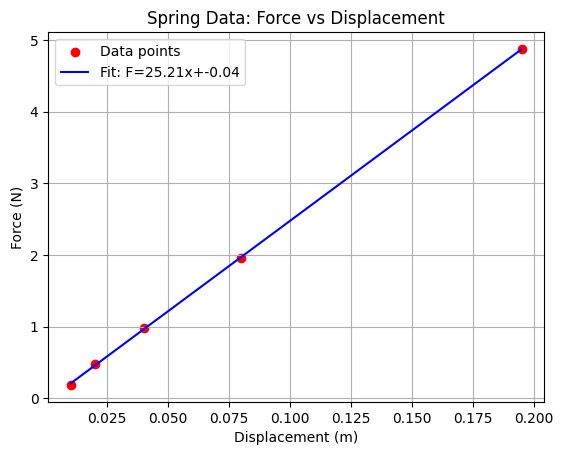

(25.21109550982422, -0.044397590134907315)

In [6]:
# plot and fit
y = np.array([d[0]*g for d in spring_data])  # Force (N)
x = np.array([(d[1]-spring_l0)/100 for d in spring_data])  # Displacement

# define linear model: Hooke's law F = kx + F0 (maybe offset)
def linear_model(x, k, F0):
    return k * x + F0

# fit model
params, covariance = curve_fit(linear_model, x, y)
k, F0 = params

# predicted values for smooth line
x_fit = np.linspace(min(x), max(x), 200)
y_fit = linear_model(x_fit, k, F0)

# plot
plt.scatter(x, y, color="red", label="Data points")
plt.plot(x_fit, y_fit, color="blue", label=f"Fit: F={k:.2f}x+{F0:.2f}")
plt.xlabel("Displacement (m)")
plt.ylabel("Force (N)")
plt.title("Spring Data: Force vs Displacement")
plt.legend()
plt.grid(True)
plt.show()

k, F0

## Vernier Data

In [22]:
# Data Labels
data_titles = {
    "Run 2":"Base Configuration (at rest)",
    "Run 4":"Base Configuration (In Phase)",
    "Run 5":"Base Configuration (Out of Phase)",
    "Run 6":"Base Configuration (Beat)",
    "Run 7":"Length Variation (at rest)",
    "Run 8":"Length Variation (In Phase)",
    "Run 9":"Length Variation (Out of Phase)",
    "Run 10":"Length Variation (Beat mode 1)",
    "Run 11":"Length Variation (Beat mode 2)",
    "Run 12":"Mass Variation (at rest)",
    "Run 13":"Mass Variation (In Phase)",
    "Run 14":"Mass Variation (Out of Phase)",
    "Run 16":"Mass Variation (Beat mode 1)",
    "Run 17":"Mass Variation (Beat mode 2)"
}

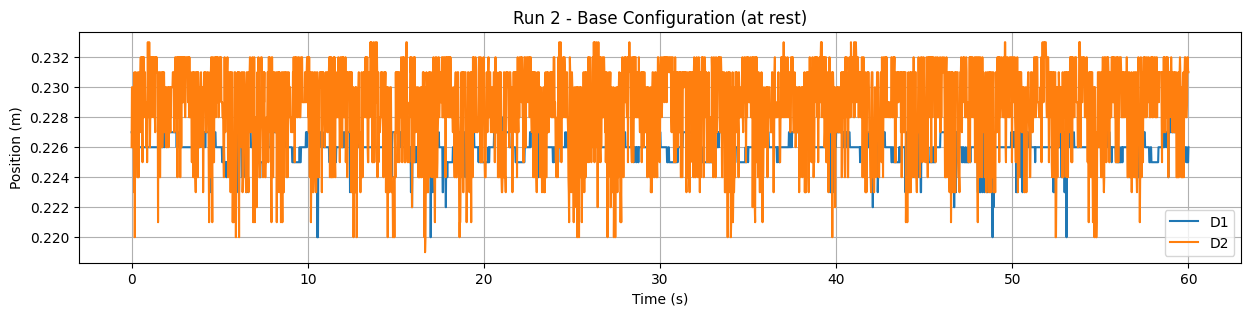

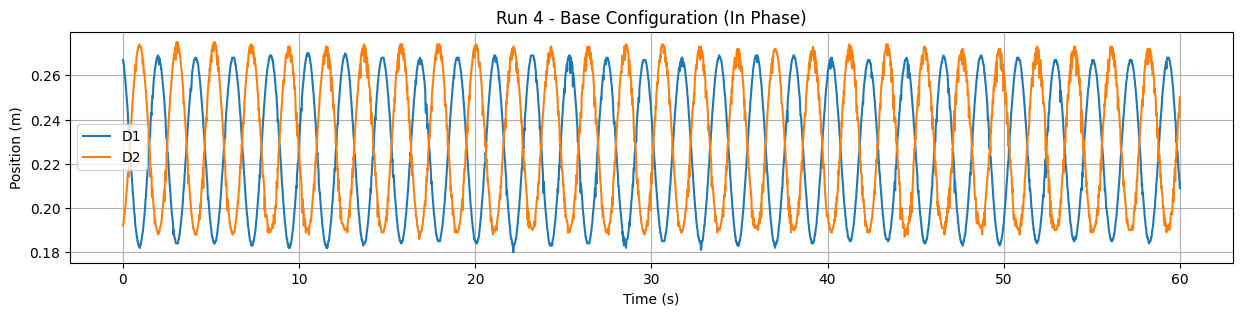

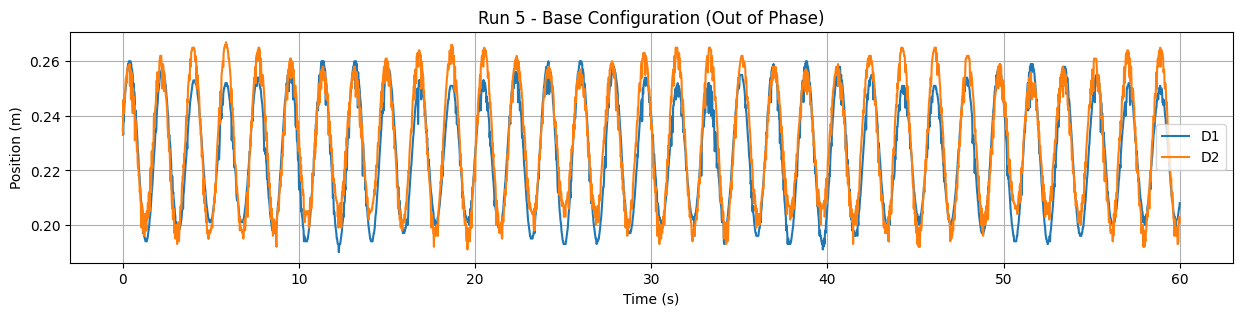

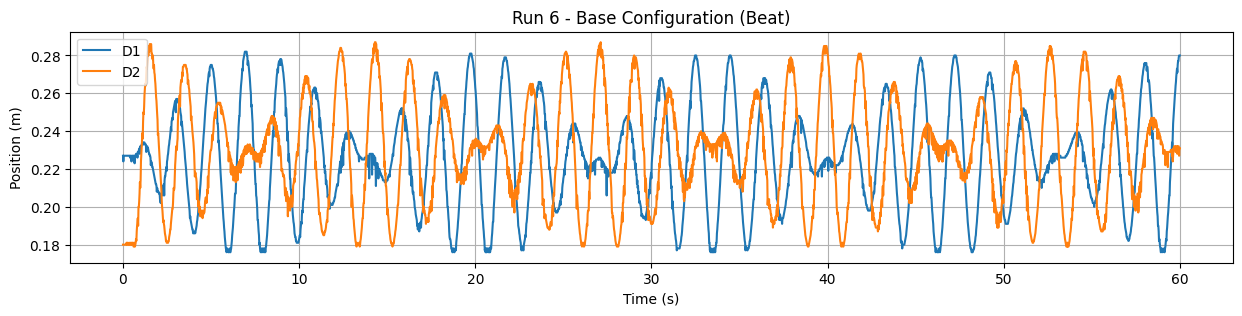

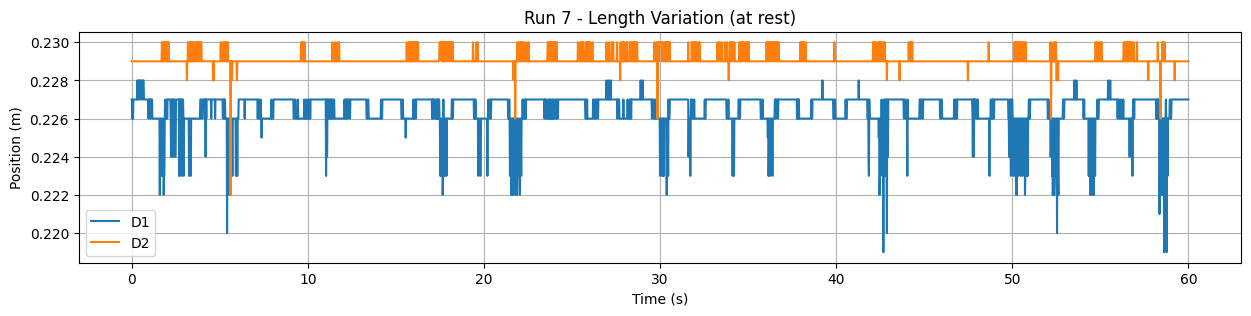

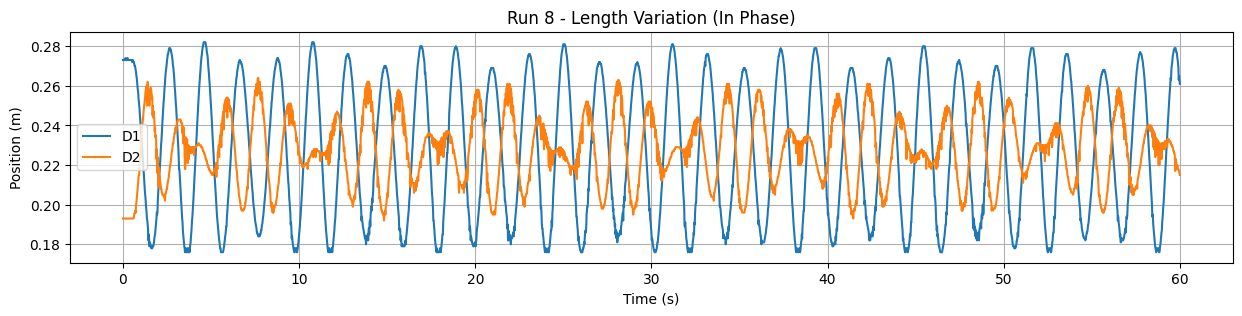

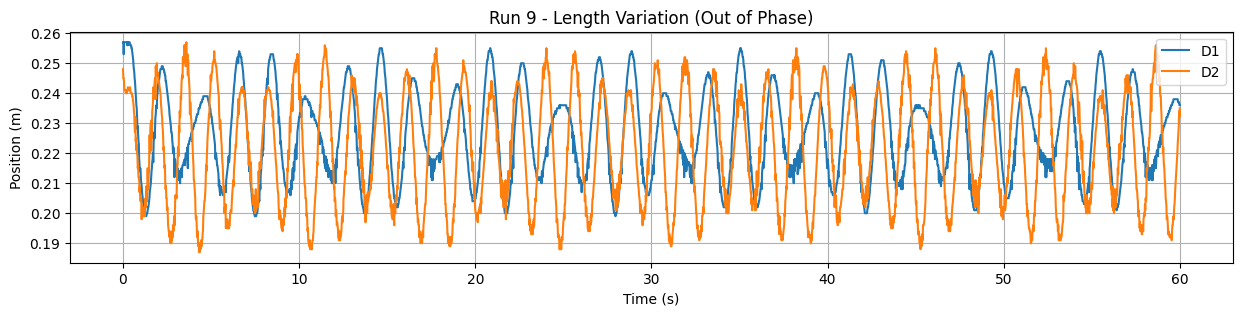

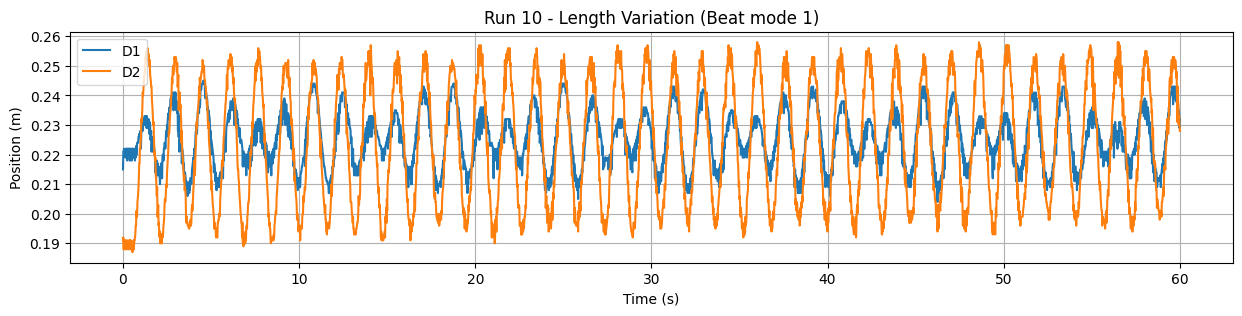

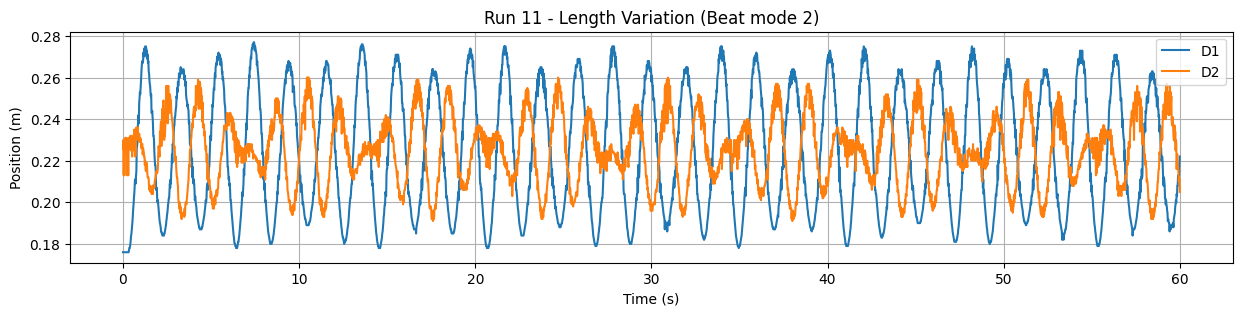

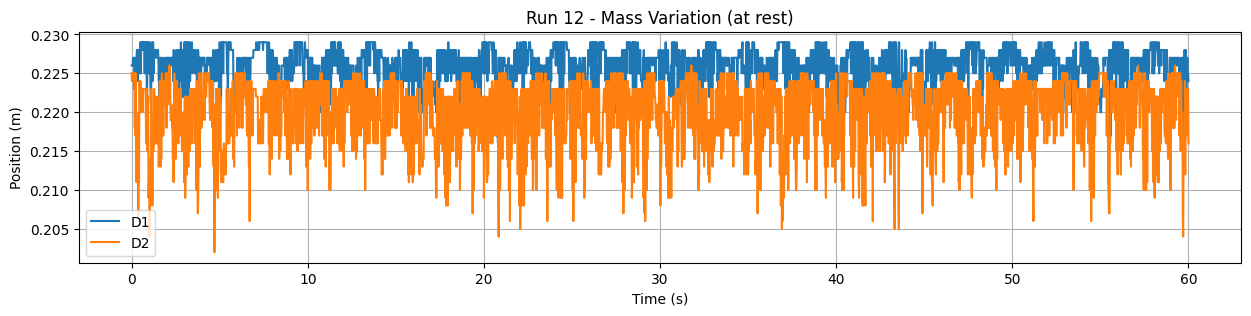

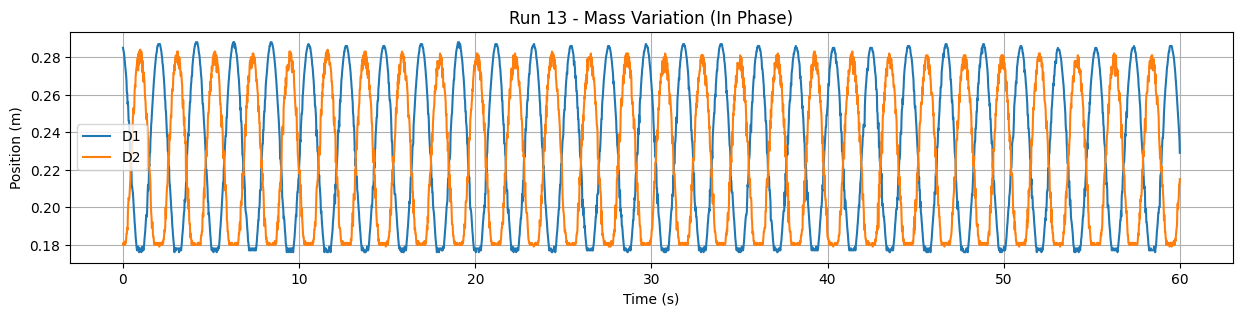

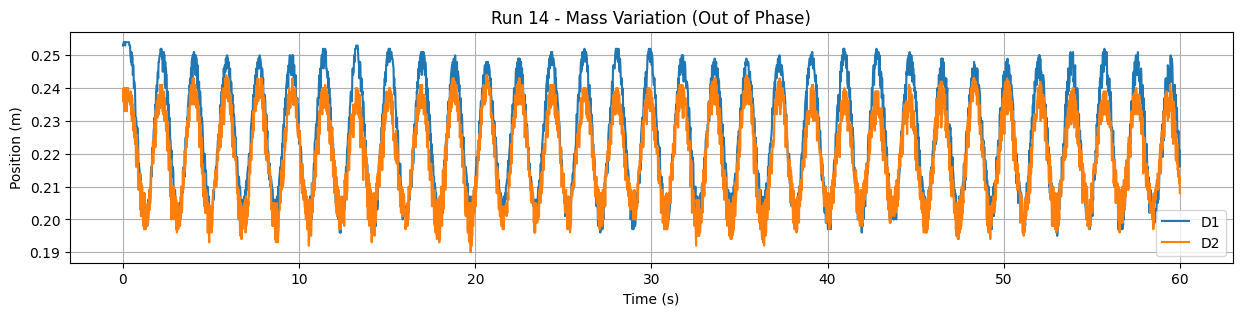

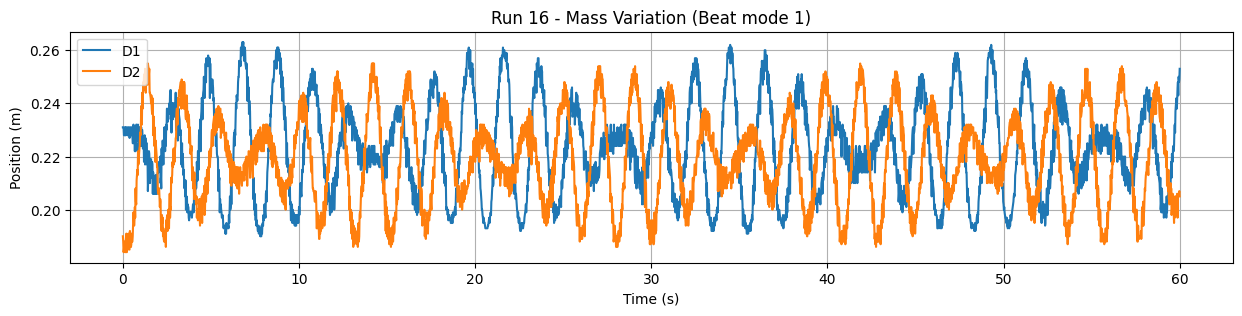

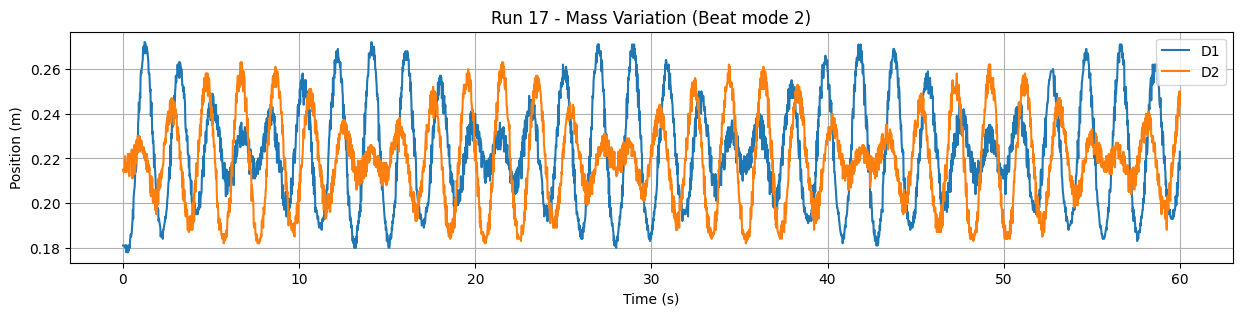

In [25]:
for i in [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17]:
    # Load Run 1 data
    df = pd.read_csv(f"runs_csv/Run_{i}.csv", sep="\t")

    df = df.apply(pd.to_numeric)

#     print("Columns:", df.columns.tolist())

    plt.figure(figsize=(15,3))
    plt.plot(df["Time"], df["Position"], label="D1")
    plt.plot(df["Time"], df["Position.1"], label="D2")

    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title(f"Run {i} - {data_titles[f"Run {i}"]}")
    plt.legend()
    plt.grid(True)
    plt.show()
